##**TASK-16**

In [7]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 1.5 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.6 MB 1.6 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.6 MB 1.8 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.6 MB 2.1 MB/s eta 0:00:04
   ------------- -------------------------- 3.1/9.6 MB 2.4 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.6 MB 2.6 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.6 MB 2.9 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 3.1 MB/s eta 0:00:02
   --------------------------- ------------ 6.6/9.6 MB 3.1 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 3.1 MB/s eta 0:00:01
   ------------------------------


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Walmart Data Analysis and Forcasting.csv")

# Convert Date column to datetime (DD-MM-YYYY format)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Preview dataset
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
# Aggregate sales by month
monthly_sales = df.groupby(pd.Grouper(key="Date", freq="M"))["Weekly_Sales"].sum()

monthly_sales.head()


Date
2010-02-28    1.903330e+08
2010-03-31    1.819198e+08
2010-04-30    2.314124e+08
2010-05-31    1.867109e+08
2010-06-30    1.922462e+08
Freq: M, Name: Weekly_Sales, dtype: float64

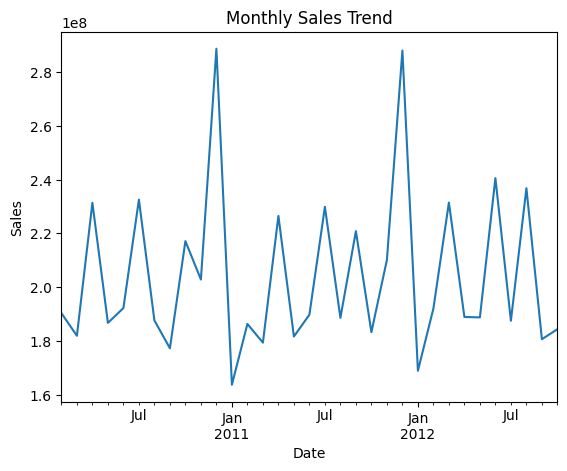

In [10]:
plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


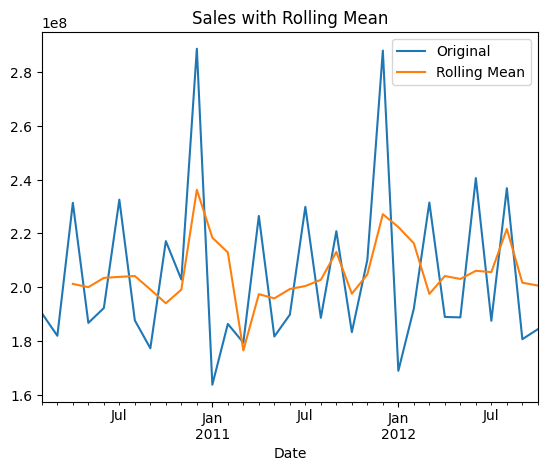

In [5]:
# Calculate rolling mean (3-month window)
rolling_mean = monthly_sales.rolling(window=3).mean()

plt.figure()
monthly_sales.plot(label="Original")
rolling_mean.plot(label="Rolling Mean")
plt.legend()
plt.title("Sales with Rolling Mean")
plt.show()


In [12]:
monthly_sales = df.groupby(pd.Grouper(key="Date", freq="M"))["Weekly_Sales"].sum()



In [13]:
split_index = int(len(monthly_sales) * 0.8)

train = monthly_sales[:split_index]
test = monthly_sales[split_index:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal=None)
model_fit = model.fit()

forecast = model_fit.forecast(len(test))



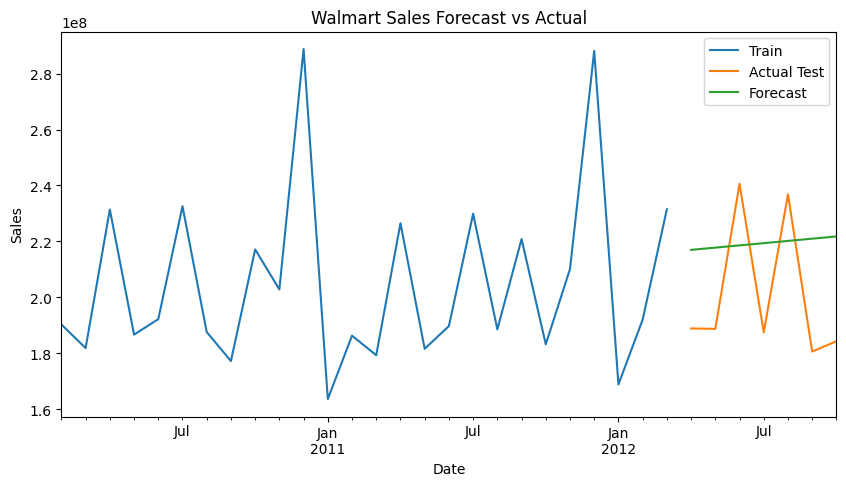

In [14]:
plt.figure(figsize=(10,5))

train.plot(label="Train")
test.plot(label="Actual Test")
forecast.plot(label="Forecast")

plt.legend()
plt.title("Walmart Sales Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error

# MAE
mae = mean_absolute_error(test, forecast)

# MAPE
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("MAE:", mae)
print("MAPE:", mape)


MAE: 29350179.994466435
MAPE: 15.153014058035627


In [16]:
# Create forecast DataFrame
forecast_df = pd.DataFrame({
    "Actual": test,
    "Forecast": forecast
})

# Export to CSV
forecast_df.to_csv("forecast_output.csv")

# Create forecast report
with open("forecast_report.txt", "w") as f:
    f.write(f"MAE: {mae}\n")
    f.write(f"MAPE: {mape}\n")
    f.write("Model Used: Exponential Smoothing\n")

print("Forecast exported successfully")


Forecast exported successfully


## INTERVIEW QUESTIONS

## 1. What is seasonality in time series?
    Seasonality refers to repeating patterns or cycles in data at regular intervals, such as monthly or yearly trends.

## 2. Why do we split train/test by time?
    Because forecasting predicts future values. Random splitting causes data leakage and unrealistic performance.

## 3. What is MAE vs MAPE?
     MAE measures average absolute error.
     MAPE measures percentage error relative to actual values.

## 4. When is moving average useful?
     Moving average is useful for smoothing short-term fluctuations and identifying underlying trends.

## 5. What makes a forecast unreliable?
     Insufficient historical data
     High volatility
     Structural changes in data
     Incorrect model selection
     Ignoring seasonality
